<a href="https://colab.research.google.com/github/GwonHyeokMIN/-/blob/main/LeNet-5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
%tensorflow_version 2.x
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses

In [7]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
x_train = tf.pad(x_train, [[0,0],[2,2],[2,2]])/255
x_test = tf.pad(x_test, [[0,0],[2,2],[2,2]])/255
x_train = tf.expand_dims(x_train, axis=3, name=None)
y_test = tf.expand_dims(x_test, axis=3, name=None)
x_val = x_train[-2000:,:,:,:]
y_val = y_train[-2000:]
x_train = x_train[:-2000,:,:,:]
y_train = y_train[:-2000]

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(6,5,activation='tanh',input_shape=x_train.shape[1:]))
model.add(layers.AveragePooling2D(2))
model.add(layers.Conv2D(16,5,activation='tanh'))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(120,5,activation='tanh'))
model.add(layers.Flatten())
model.add(layers.Dense(84,activation='tanh'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()
Model: "sequential"

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
activation (Activation)      (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten (Flatten)            (None, 120)               0

In [9]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train, batch_size = 64, epochs=30, validation_data=(x_val, y_val))

Epoch 1/40
907/907 [==============================] - 3s 4ms/step - loss: 0.0176 - accuracy: 0.9938 - val_loss: 0.0390 - val_accuracy: 0.9920
Epoch 2/40
907/907 [==============================] - 3s 4ms/step - loss: 0.0169 - accuracy: 0.9946 - val_loss: 0.0433 - val_accuracy: 0.9920
Epoch 3/40
907/907 [==============================] - 3s 4ms/step - loss: 0.0183 - accuracy: 0.9936 - val_loss: 0.0485 - val_accuracy: 0.9910
Epoch 4/40
907/907 [==============================] - 3s 4ms/step - loss: 0.0171 - accuracy: 0.9942 - val_loss: 0.0565 - val_accuracy: 0.9895
Epoch 5/40
907/907 [==============================] - 3s 4ms/step - loss: 0.0167 - accuracy: 0.9943 - val_loss: 0.0553 - val_accuracy: 0.9875
Epoch 6/40
907/907 [==============================] - 3s 4ms/step - loss: 0.0167 - accuracy: 0.9944 - val_loss: 0.0550 - val_accuracy: 0.9900
Epoch 7/40
907/907 [==============================] - 3s 4ms/step - loss: 0.0149 - accuracy: 0.9948 - val_loss: 0.0538 - val_accuracy: 0.9915
Epoch 

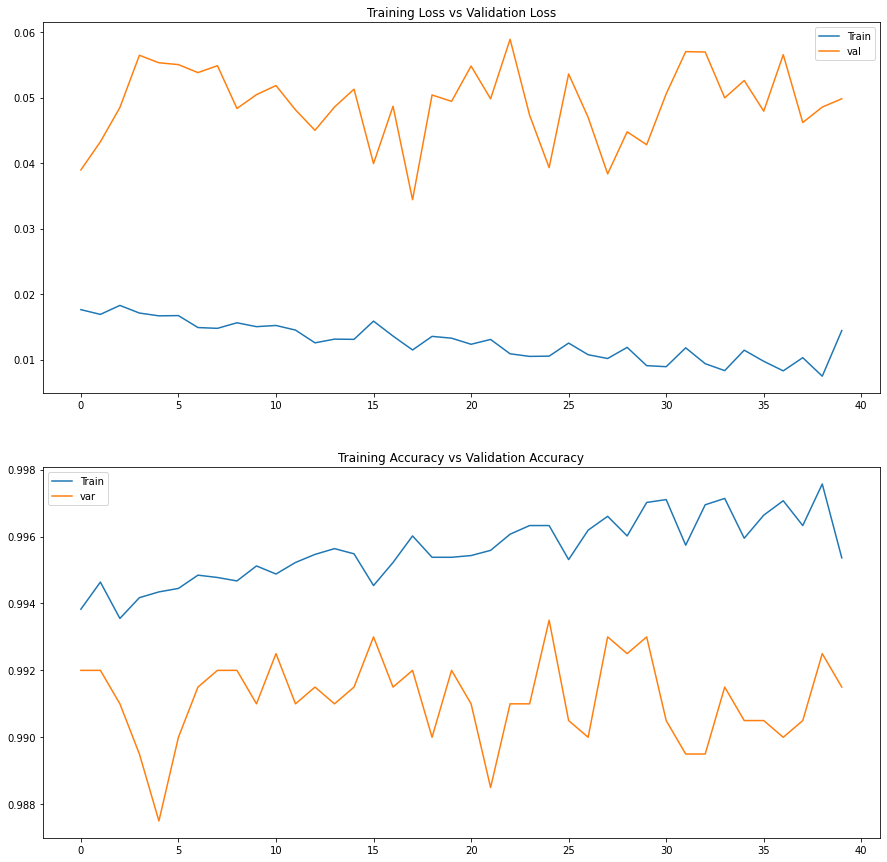

In [13]:
fig,axs = plt.subplots(2,1,figsize=(15,15))
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].legend(['Train', 'val'])
axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].legend(['Train','var'])